In [101]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Problem 1. Predicting SalePrice using GrLivArea


In [102]:
#import dataset
data = pd.read_csv("train.csv")
saleprice = pd.DataFrame(data['SalePrice']) #Response
area = pd.DataFrame(data['GrLivArea']) #Predictor


### Uni-Variate Linear Regression 
We will start by setting up a Uni-Variate Linear Regression 

Response Variable : SalePrice
<br> 
Predictor Feature : GrLivArea 

Set up the regression problem with Train and Test datasets.   
Split the "SalePrice" & "GrLivArea" train and test sets randomly and perform linear Regression


In [103]:
# import essential functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse = mean_squared_error
train_area, test_area, train_saleprice, test_saleprice = train_test_split(area, saleprice, test_size = 0.2)
# Check the sample sizes
print("Train Set :", train_area.shape,train_saleprice.shape)
print("Test Set  :", test_area.shape, test_saleprice.shape)


Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Intercept of Regression:	: b =  [21867.15032407]
Coefficients of Regression:	: a =  [[105.04312089]]

Train Set - Explained Variance (R^2)	: 0.4900084167300688

Test Set Metrics
Mean Squared Error (MSE) 	: 2786013430.226938
Root Mean Squared Error (RMSE) 	: 52782.700103603434



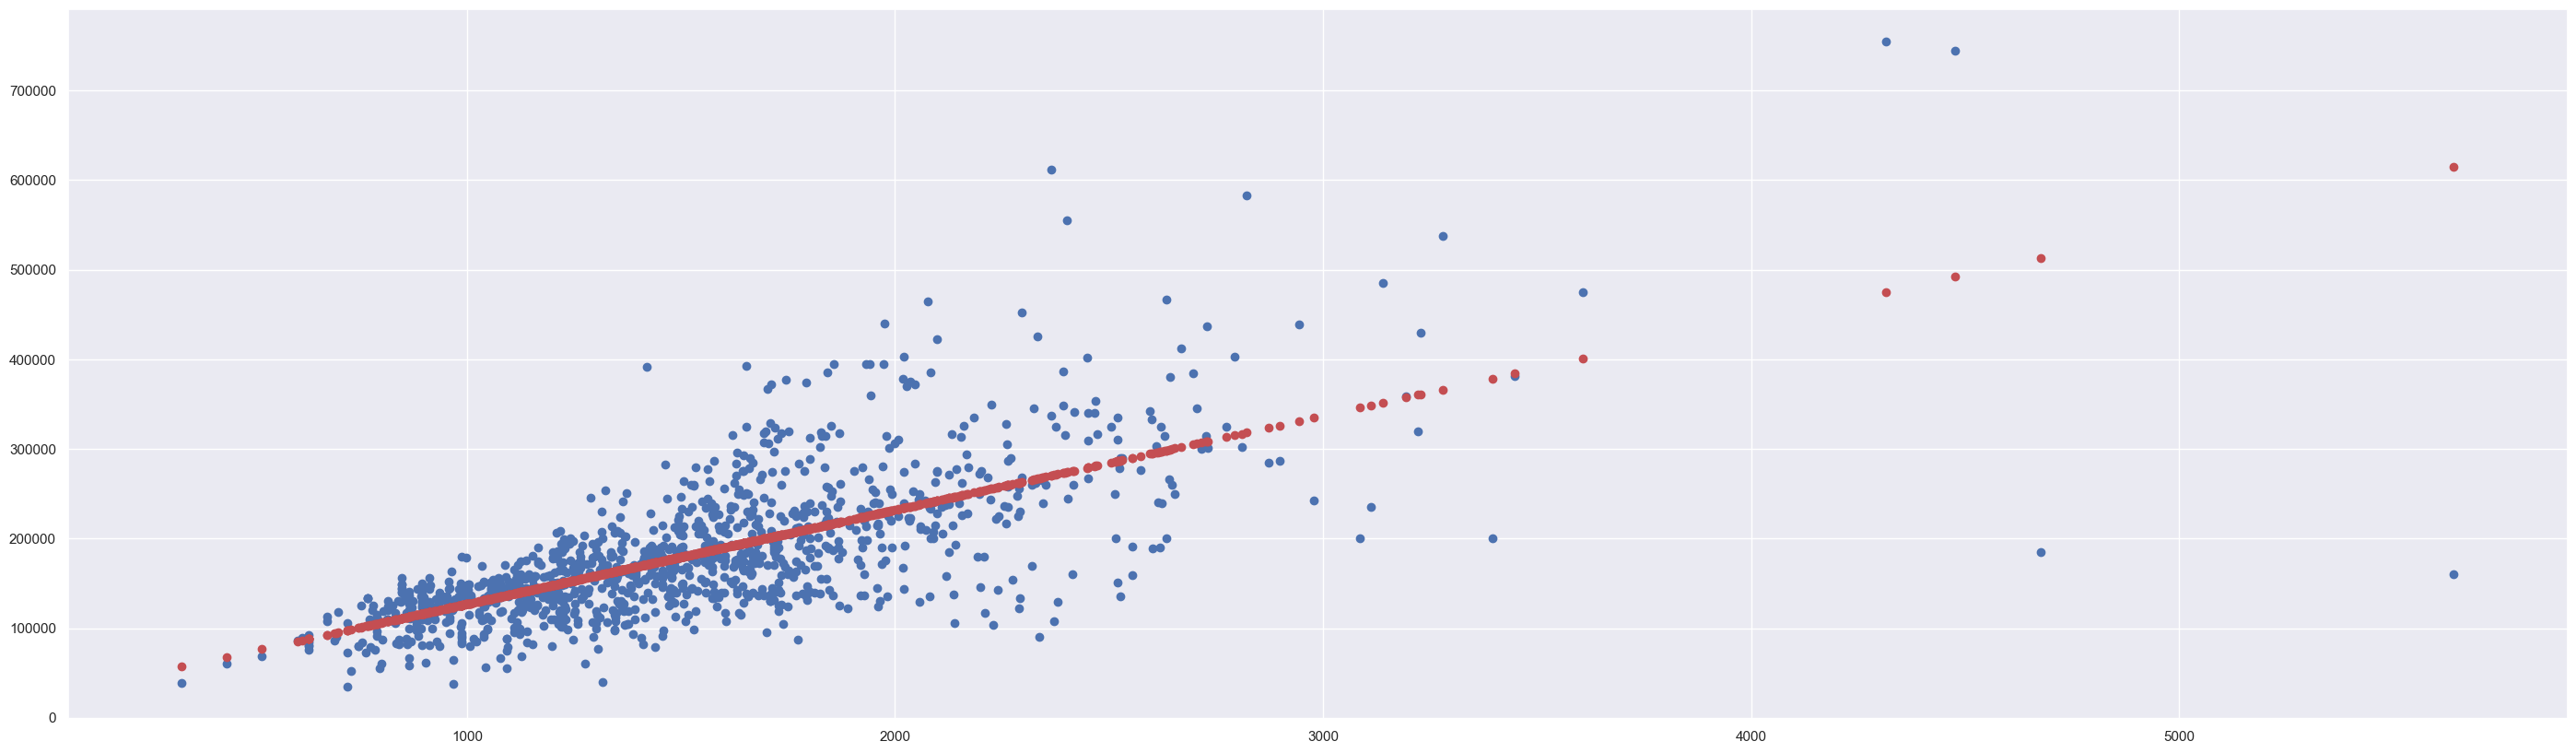

In [104]:
# Linear Regression using Train Data
linreg = LinearRegression() # Create a Linear Regression object
linreg.fit(train_area, train_saleprice) # Train the Linear Regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression:\t: b = ', linreg.intercept_)
print('Coefficients of Regression:\t: a = ', linreg.coef_)
print()

# Predict Saleprice values corresponding to GrLivArea
saleprice_train_pred = linreg.predict(train_area)
saleprice_test_pred = linreg.predict(test_area)


# Explaioned Variance(R^2) & Mean Square Error <- test set
print("Train Set - Explained Variance (R^2)\t:", linreg.score(train_area,train_saleprice))
print()
print("Test Set Metrics")
print("Mean Squared Error (MSE) \t:", mse(test_saleprice, saleprice_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse(test_saleprice, saleprice_test_pred)))
print()


# Plot the Linear Regression Line
f = plt.figure(figsize=(35,10))
#
plt.scatter(train_area, train_saleprice)
plt.scatter(train_area, saleprice_train_pred, color = "r")

## Problem 2 - Predicting SalePrice against other variables


Train set: (1168, 1) (1168, 1)
Test set: (292, 1) (292, 1)

Intercept of Regression:	: b =  [71124.64708121]
Coefficients of Regression:	: a =  [[231.96701847]]

Train Set - Explained Variance (R^2)	: 0.38618312442105285

Test Set Metrics


TypeError: 'numpy.float64' object is not callable

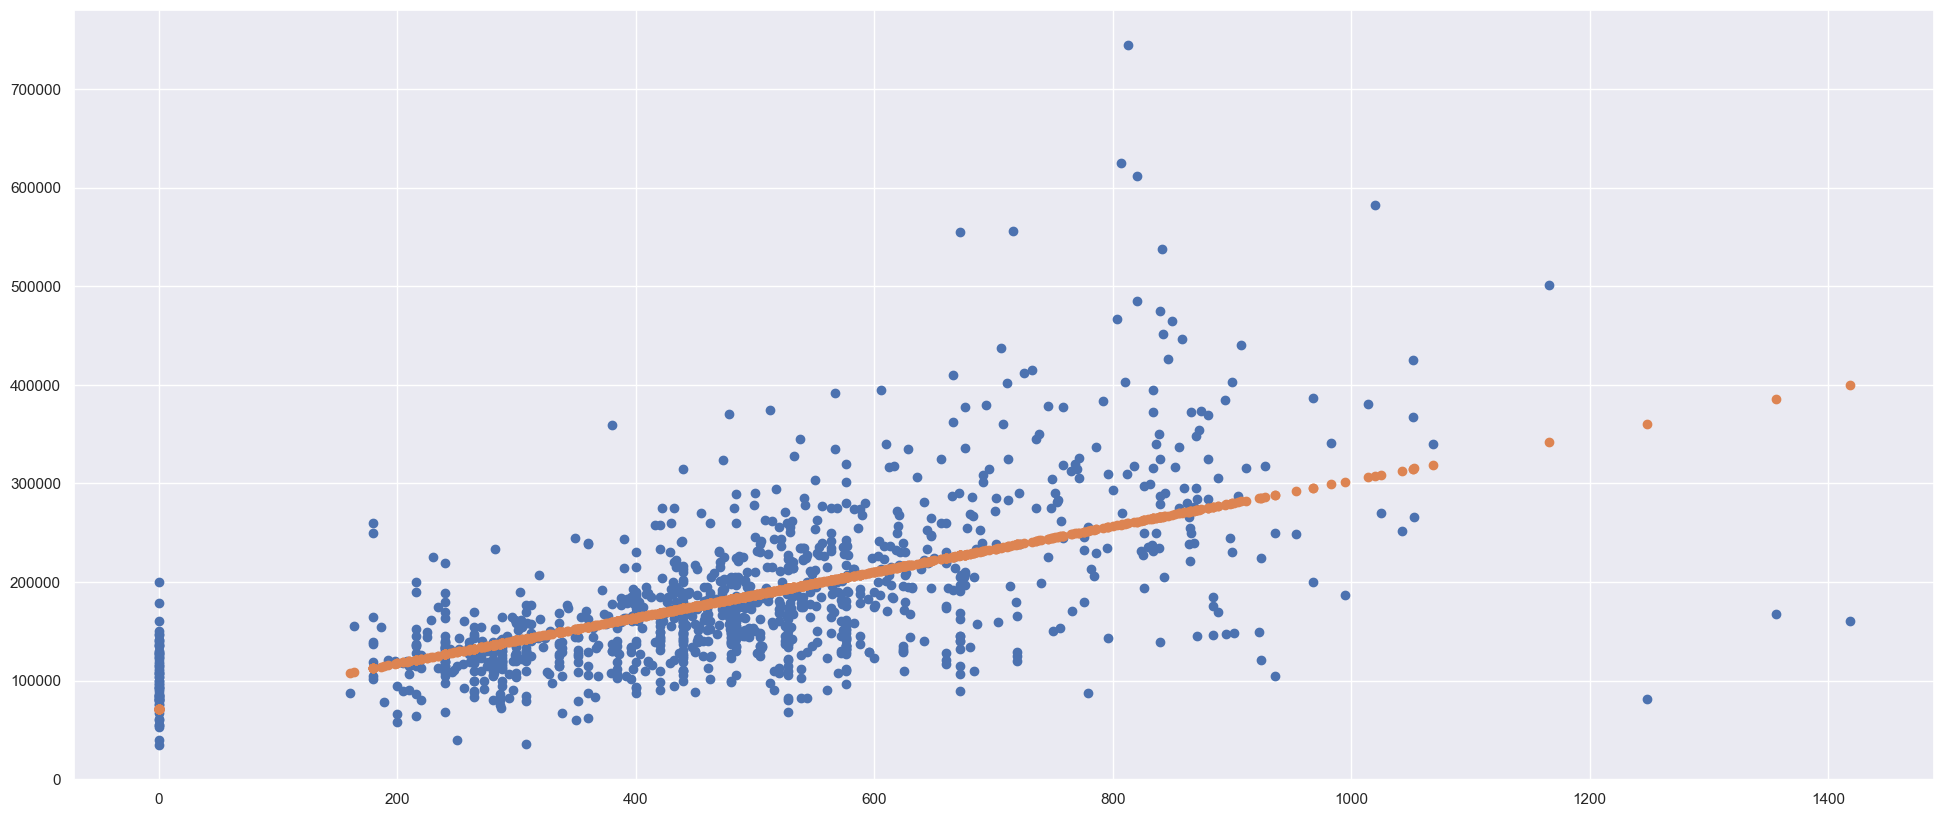

In [105]:

totalBsmtSF = pd.DataFrame(data['TotalBsmtSF'])
garageArea = pd.DataFrame(data['GarageArea'])

def LinRegression (predictor,response, testSize = 0.2,SolidLine = False):

    x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)


    #print("********** Dataset : {0} vs {1} **********".format(predictor,response))
    #printout the number of data entries in each datasets
    print("Train set:", x_train.shape, y_train.shape)
    print("Test set:", x_test.shape, y_test.shape)
    print()
    # Linear Regression using Train Data
    linreg = LinearRegression() # Create a Linear Regression object
    linreg.fit(x_train,y_train) # Train the Linear Regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression:\t: b = ', linreg.intercept_)
    print('Coefficients of Regression:\t: a = ', linreg.coef_)
    print()

    # Predict Saleprice values corresponding to GrLivArea
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
     
    f = plt.figure(figsize=(24,10))
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,y_train_pred)

    
        
    mse = mean_squared_error(y_test, y_test_pred)
    print("Train Set - Explained Variance (R^2)\t:", linreg.score(x_train,y_train))
    print()
    print("Test Set Metrics")
    MSE = mse(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", MSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE) \t:", RMSE)
    print()
    print()

LinRegression(garageArea ,saleprice)
LinRegression(totalBsmtSF ,saleprice)





## Problem 3 

In [ ]:

#Function to find number of outliers
def whiskers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr = q3 - q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    return (lowerbound,upperbound)

salePriceBounds = whiskers(data["SalePrice"])
grLivAreaBounds = whiskers(data["GrLivArea"])

Filtered = data[(data['SalePrice'] >= salePriceBounds[0]) & (data['SalePrice'] <= salePriceBounds[1]) 
                & (data['GrLivArea'] >= grLivAreaBounds[0]) & (data['GrLivArea'] <= grLivAreaBounds[1])]


Train set: (1106, 1) (1106, 1)
Test set: (277, 1) (277, 1)

Intercept of Regression:	: b =  [32091.05687388]
Coefficients of Regression:	: a =  [[94.40997205]]

Explained Variance (R^2) 	: 0.4809487017267854
Mean Squared Error (MSE) 	: 1769758207.2726443
Root Mean Squared Error (RMSE) 	: 42068.49423586069




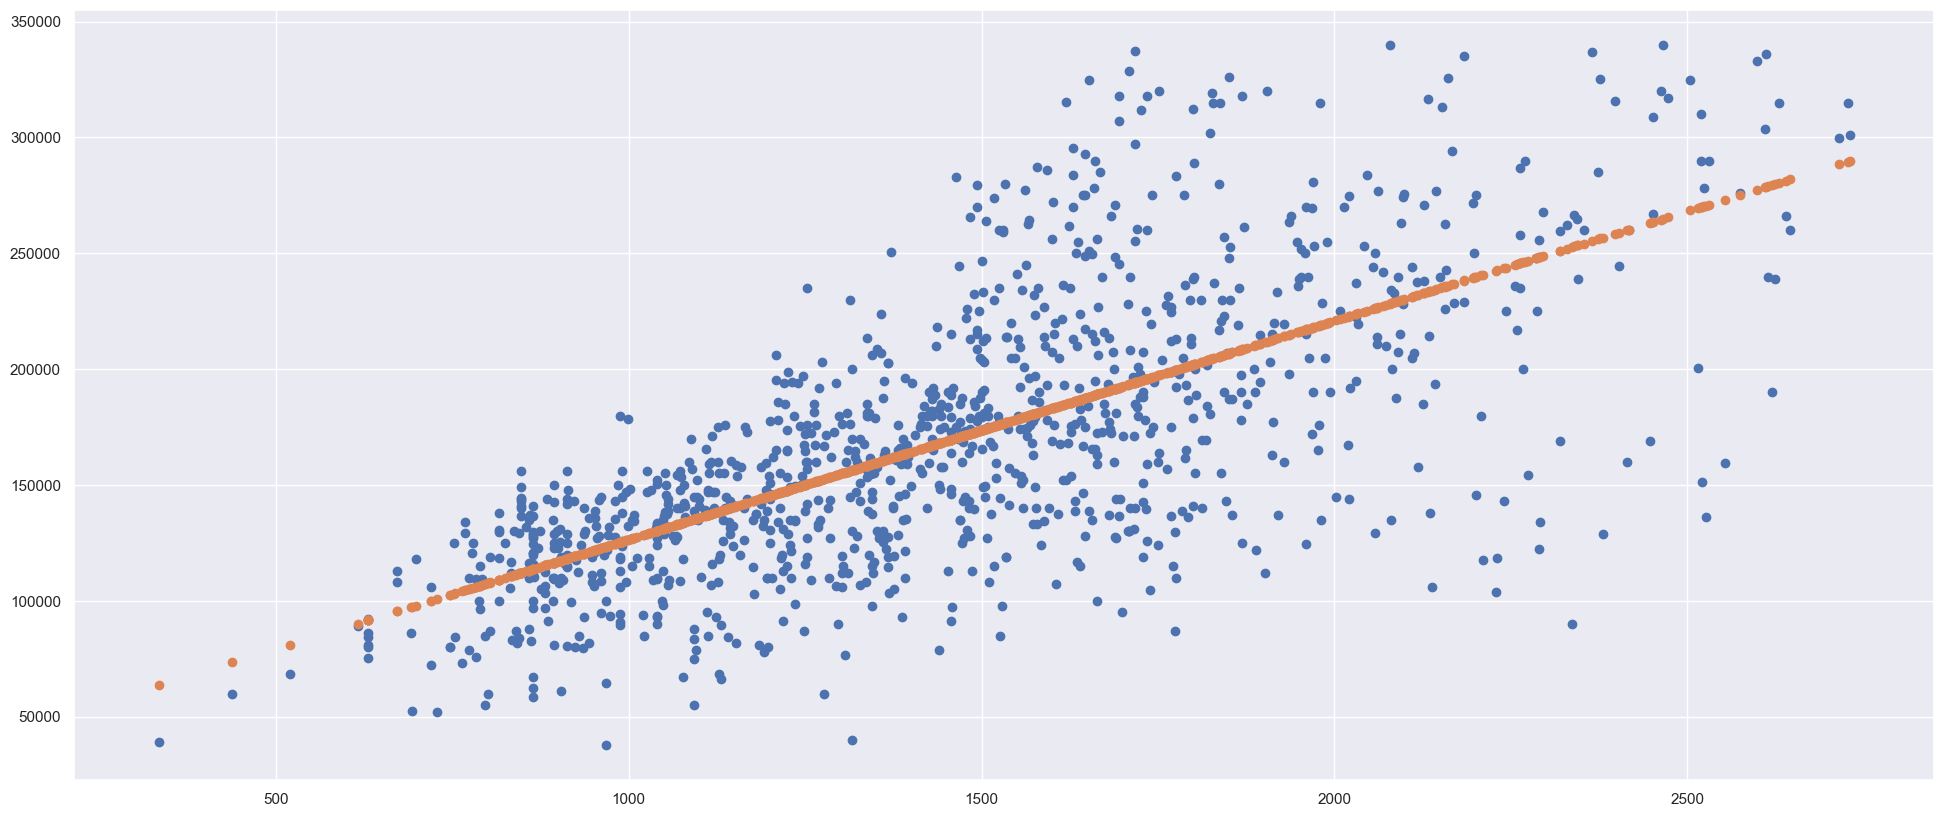

In [ ]:
filteredSalePrice = pd.DataFrame(Filtered['SalePrice'])
filteredGrArea = pd.DataFrame(Filtered['GrLivArea'])

LinRegression(filteredGrArea , filteredSalePrice)

